# Spam or Ham

In this project, I will look at the SMS Spam Collection Dataset with the text of 5572 SMSs and a label classifying them as "spam" or "ham". I will **clean the data** first, then pre-process it using **tf-idf for natural language processing** and finally train and evaluate multiple **classification models** on the data.

### Loading and cleaning the data

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [74]:
# dropping and renaming columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
data = data.rename(columns = {"v1":"label", "v2":"text"})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [76]:
data.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

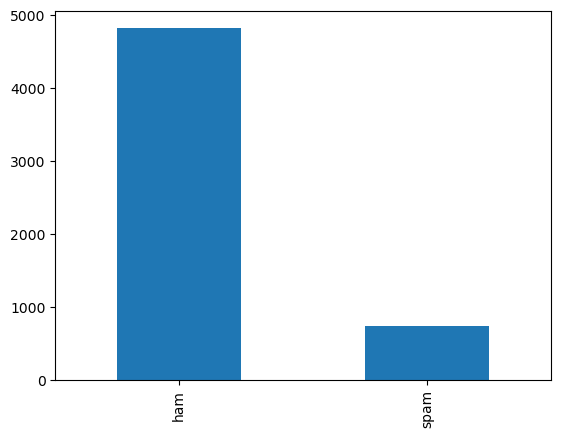

In [77]:
## Seeing how many text are labelled as spam and ham.
data.label.value_counts().plot.bar();

### Transforming data.

In [78]:
# adding a numerical label for spam
data["spam"] = data["label"].map({'spam': 1, 'ham': 0}).astype(int)
data.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [79]:
# adding an additional column for length of the text.
data["length"] = data["text"].apply(len)
data.head()

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

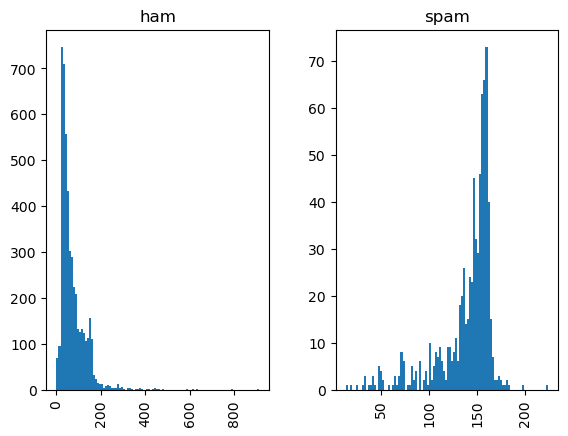

In [80]:
# plotting distribution of spam and ham mesages length.
data.hist(column='length', by = 'label', bins = 100)

In [81]:
!pip install wordcloud

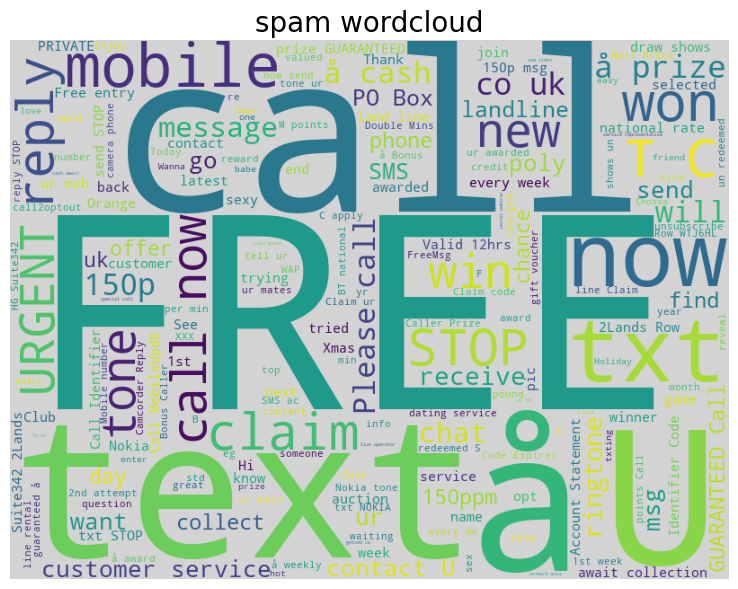

In [82]:
# word cloud of spam words
import wordcloud
text = ' '.join(data[data['spam'] == 1]['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
    
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
plt.figure(figsize=(10,7), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title("spam wordcloud", fontsize=20 )
plt.show()

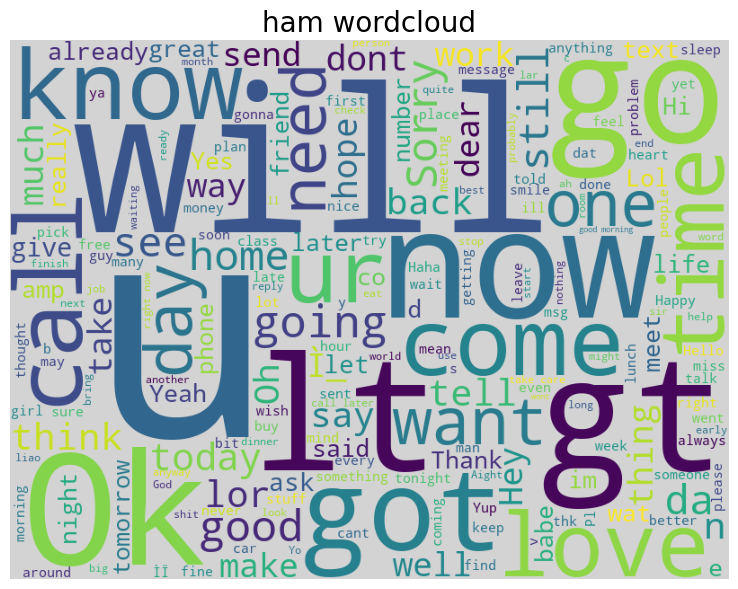

In [84]:
# word cloud of ham words.
text = ' '.join(data[data['spam'] == 0]['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
    
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
plt.figure(figsize=(10,7), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title("ham wordcloud", fontsize=20 )
plt.show()

### Preprocessing the data

In [85]:
import string
from nltk.corpus import stopwords

def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ellietripathi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
data['text'].apply(remove_punctuation_and_stopwords).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [88]:
from collections import Counter

data_ham  = data[data['spam'] == 0].copy()
data_spam = data[data['spam'] == 1].copy()

In [90]:
# removing stop words and punctuations from ham list and spam data.
data_ham.loc[:, 'text'] = data_ham['text'].apply(remove_punctuation_and_stopwords)
words_data_ham = data_ham['text'].tolist()
data_spam.loc[:, 'text'] = data_spam['text'].apply(remove_punctuation_and_stopwords)
words_data_spam = data_spam['text'].tolist()

In [91]:
# creating a list of ham words.
list_ham_words = []
for sublist in words_data_ham:
    for word in sublist:
        list_ham_words.append(word)

In [92]:
# creating a list of spam words.
list_spam_words = []
for sublist in words_data_spam:
    for word in sublist:
        list_spam_words.append(word)

In [93]:
# top 30 ham words by frequency.
count_ham_words = Counter(list_ham_words)
df_ham_words_top_30 = pd.DataFrame(count_ham_words.most_common(30), columns=['word', 'count'])

In [94]:
# top 30 spam words by frequency.
count_spam_words = Counter(list_spam_words)
df_spam_words_top_30 = pd.DataFrame(count_spam_words.most_common(30), columns=['word', 'count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'sorryillcalllater'),
  Text(1, 0, 'ok'),
  Text(2, 0, 'cantpickphonerightplssendmessage'),
  Text(3, 0, 'okie'),
  Text(4, 0, 'oklor'),
  Text(5, 0, 'sorryillcalllatermeeting'),
  Text(6, 0, 'wenurlovablebcumsangrywidudnttakeseriouslycozangrychildishntruewayshowingdeepaffectioncarenluvkettodamandanicedayda'),
  Text(7, 0, 'opinion12jada3kusruthi4lovable5silent6splcharacter7matured8stylish9simpleplsreply'),
  Text(8, 0, '7wondersworld7th6thurstyle5thursmile4thurpersonality3rdurnature2ndursms1sturlovelyfriendshipgoodmorningdear'),
  Text(9, 0, 'sayslowlygodiloveampneedyoucleanheartbloodsendtenspecialpeopleampucmiracletomorrowitplspls'),
  Text(10, 0, 'perrequestmellemelleoruminnaminungintenurunguvettamsetcallertunecallerspress9copyfriendscallertune'),
  Text(11, 0, 'callsmessagesmissedcalls'),
  Text(12, 0, 'placeman'),
  Text(13, 0, 'ent

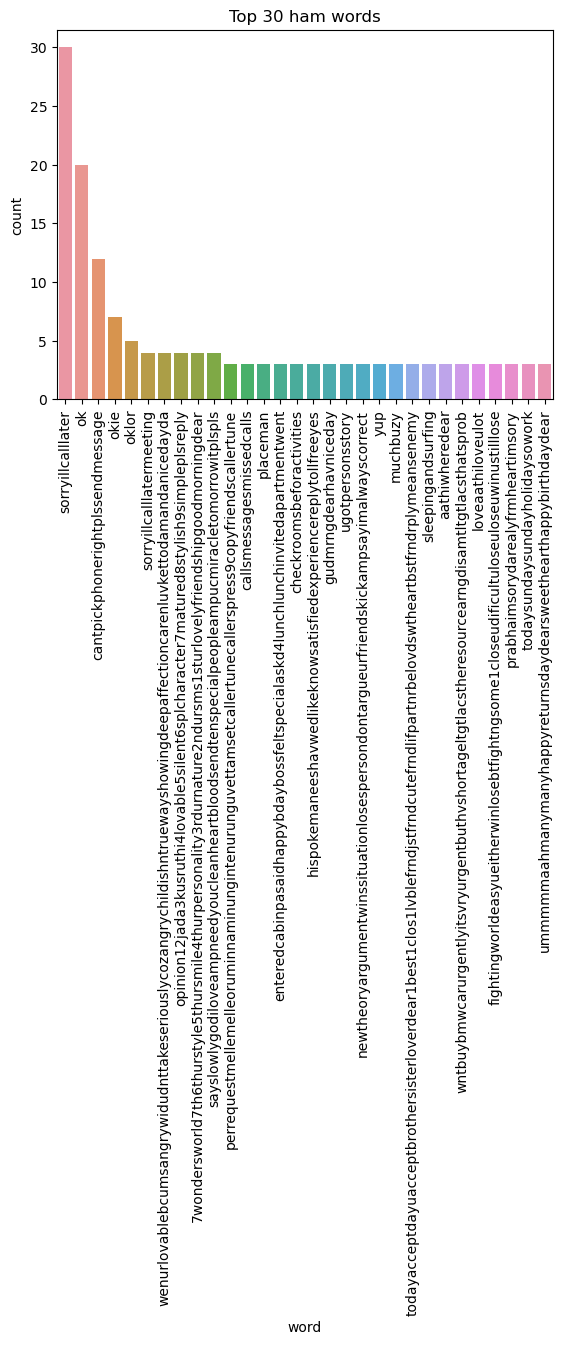

In [96]:
# plotting top 30 ham words.
import seaborn as sns
sns.barplot(x = 'word', y = 'count',
           data = df_ham_words_top_30)
plt.title("Top 30 ham words")
plt.xticks(rotation = "vertical")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'pleasecallcustomerservicerepresentativefreephone080814547429am11pmguaranteedå£1000cashå£5000prize'),
  Text(1, 0, 'cameraawardedsipixdigitalcameracall09061221066frommlandlinedeliverywithin28days'),
  Text(2, 0, 'congrats1yearspecialcinemapass2call09061209465csuprmanvmatrix3starwars3etc4freebx420ip45we150pmdontmiss'),
  Text(3, 0, 'hmvbonusspecial500poundsgenuinehmvvouchersanswer4easyquestionsplaysendhmv86688infowww100percentrealcom'),
  Text(4, 0, 'decembermobile11mthsentitledupdatelatestcolourcameramobilefreecallmobileupdatecofree08002986906'),
  Text(5, 0, 'loanpurposeå£500å£75000homeownerstenantswelcomepreviouslyrefusedstillhelpcallfree08001956669textbackhelp'),
  Text(6, 0, 'free1stweekno1nokiatone4urmobeveryweektxtnokia8007gettxtingtellurmateswwwgetzedcoukpobox36504w45wqnorm150ptone16'),
  Text(7, 0, 'dontknowuudontknowsendchat8668

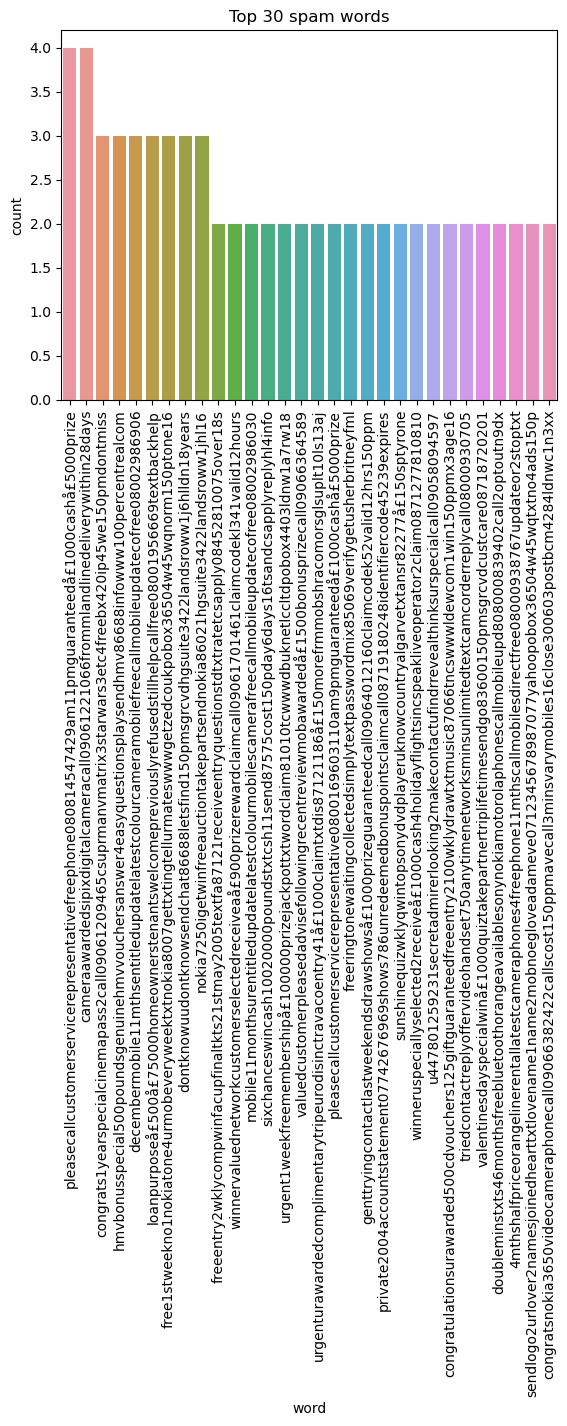

In [97]:
# plotting top 30 spam words.
sns.barplot(x = 'word', y = 'count',
           data = df_spam_words_top_30)
plt.title("Top 30 spam words")
plt.xticks(rotation = "vertical")

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
transformer = CountVectorizer(analyzer=remove_punctuation_and_stopwords).fit(data['text'])

In [99]:
new_data = transformer.transform(data['text'])
new_data.shape

(5572, 9431)

In [100]:
new_data

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [101]:
print(new_data.nnz/(new_data.shape[0] * new_data.shape[1]) * 100)

0.09471444959776236


In [102]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(new_data)

In [103]:
data_tfidf = tfidf.transform(new_data)

In [104]:
data_tfidf

<5572x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_tfidf, data["spam"], test_size=0.2, random_state=1)

### Naive Bayes Classifier

Accuracy: 0.9713004484304932


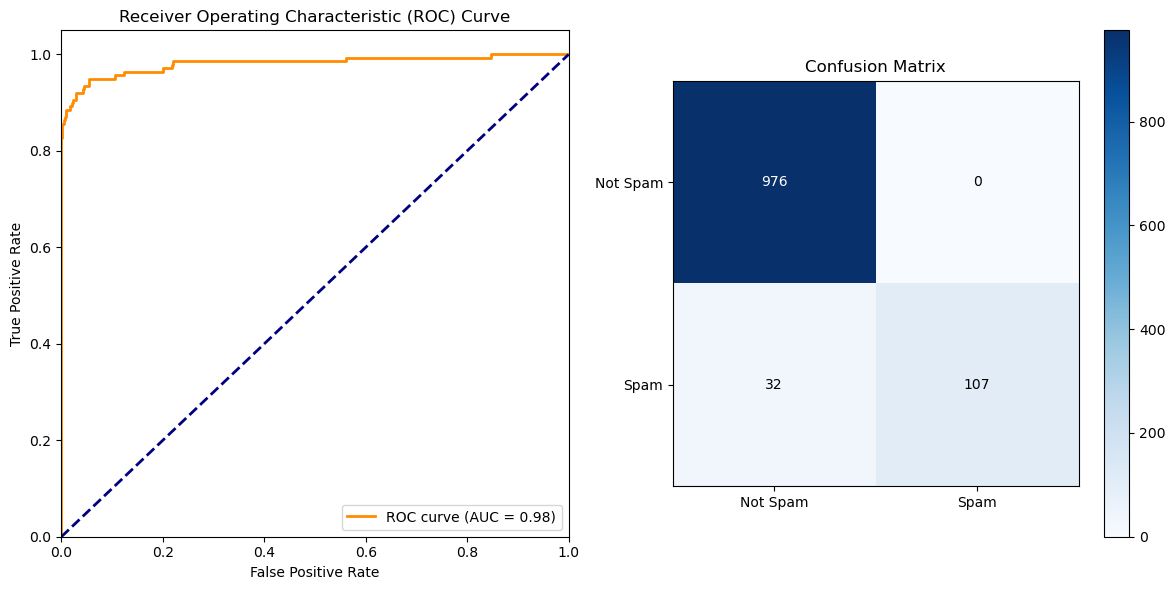

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Train the Multinomial Naive Bayes model
spam_detect_model = MultinomialNB().fit(X_train, y_train)

# Predict on the test set
pred_test_MNB = spam_detect_model.predict(X_test)

# Calculate accuracy
acc_MNB = accuracy_score(y_test, pred_test_MNB)
print("Accuracy:", acc_MNB)

# Calculate predicted probabilities
pred_probs = spam_detect_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

# Plot ROC curve and confusion matrix side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot confusion matrix
cm = confusion_matrix(y_test, pred_test_MNB)
im = ax2.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix")
plt.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(2))
ax2.set_xticklabels(['Not Spam', 'Spam'])
ax2.set_yticklabels(['Not Spam', 'Spam'])

# Display numbers on confusion matrix
for i in range(2):
    for j in range(2):
        ax2.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

fig.tight_layout()
plt.show()


### KNN Classifier

Best Accuracy: 0.9408071748878923
Best Parameters: {'n_neighbors': 15}


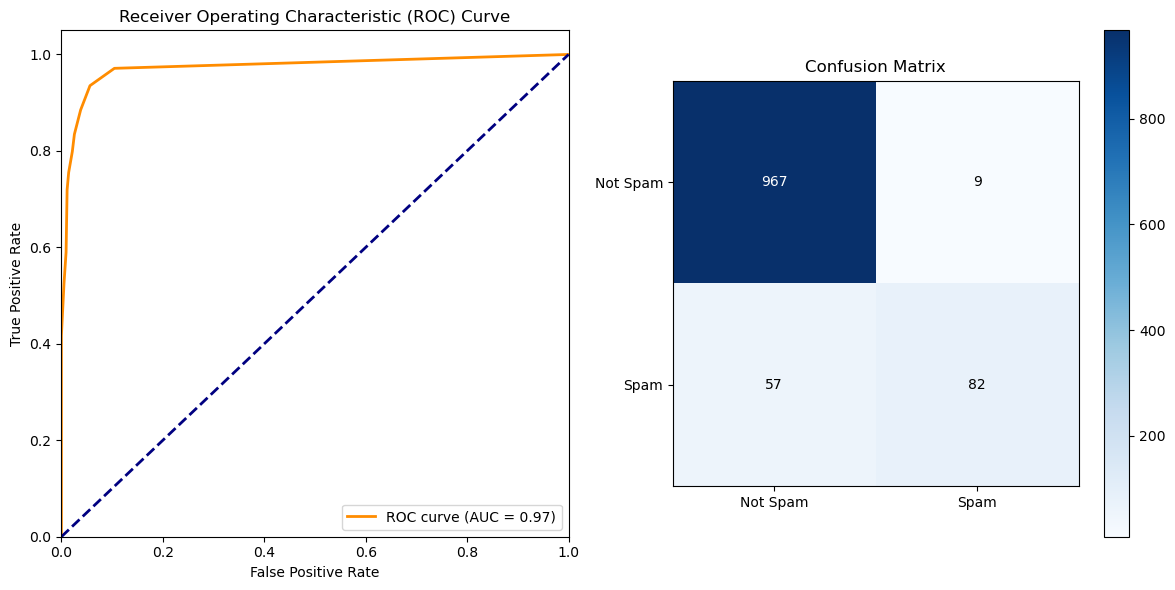

In [109]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [8, 15, 20]
}

# Create GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)  # You can adjust the cross-validation folds (cv) as needed

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_knn = grid_search.best_estimator_

# Predict on the test set using the best estimator
pred_test_best = best_knn.predict(X_test)

# Calculate and print accuracy
acc_best = accuracy_score(y_test, pred_test_best)
print("Best Accuracy:", acc_best)
print("Best Parameters:", grid_search.best_params_)

# Calculate predicted probabilities for ROC curve
pred_probs = best_knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

# Plot ROC curve and confusion matrix side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot confusion matrix
cm = confusion_matrix(y_test, pred_test_best)
im = ax2.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix")
plt.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(2))
ax2.set_xticklabels(['Not Spam', 'Spam'])
ax2.set_yticklabels(['Not Spam', 'Spam'])

# Display numbers on confusion matrix
for i in range(2):
    for j in range(2):
        ax2.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

fig.tight_layout()
plt.show()




### SVC

Best Accuracy: 0.9883408071748879
Best Parameters: {'C': 10, 'kernel': 'linear'}


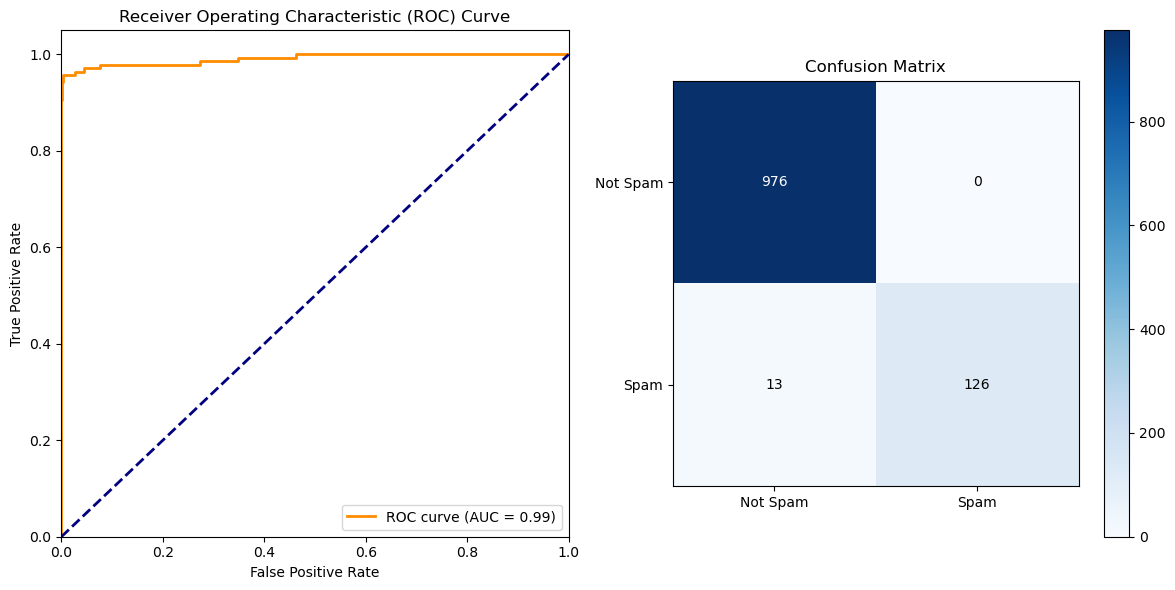

In [110]:
from sklearn.svm import SVC

# Create an SVC classifier
svc_classifier = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # You can adjust the values of C as needed
    'kernel': ['linear', 'rbf', 'poly']  # You can adjust the kernel options as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5)  # You can adjust the cross-validation folds (cv) as needed

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_svc = grid_search.best_estimator_

# Predict on the test set using the best estimator
pred_test_best = best_svc.predict(X_test)

# Calculate and print accuracy
acc_best = accuracy_score(y_test, pred_test_best)
print("Best Accuracy:", acc_best)
print("Best Parameters:", grid_search.best_params_)

# Calculate predicted probabilities for ROC curve
pred_probs = best_svc.decision_function(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

# Plot ROC curve and confusion matrix side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot confusion matrix
cm = confusion_matrix(y_test, pred_test_best)
im = ax2.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix")
plt.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(2))
ax2.set_xticklabels(['Not Spam', 'Spam'])
ax2.set_yticklabels(['Not Spam', 'Spam'])

# Display numbers on confusion matrix
for i in range(2):
    for j in range(2):
        ax2.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

fig.tight_layout()
plt.show()





### SGD Classifier

Best Accuracy: 0.989237668161435
Best Parameters: {'alpha': 0.0001, 'penalty': 'l2'}


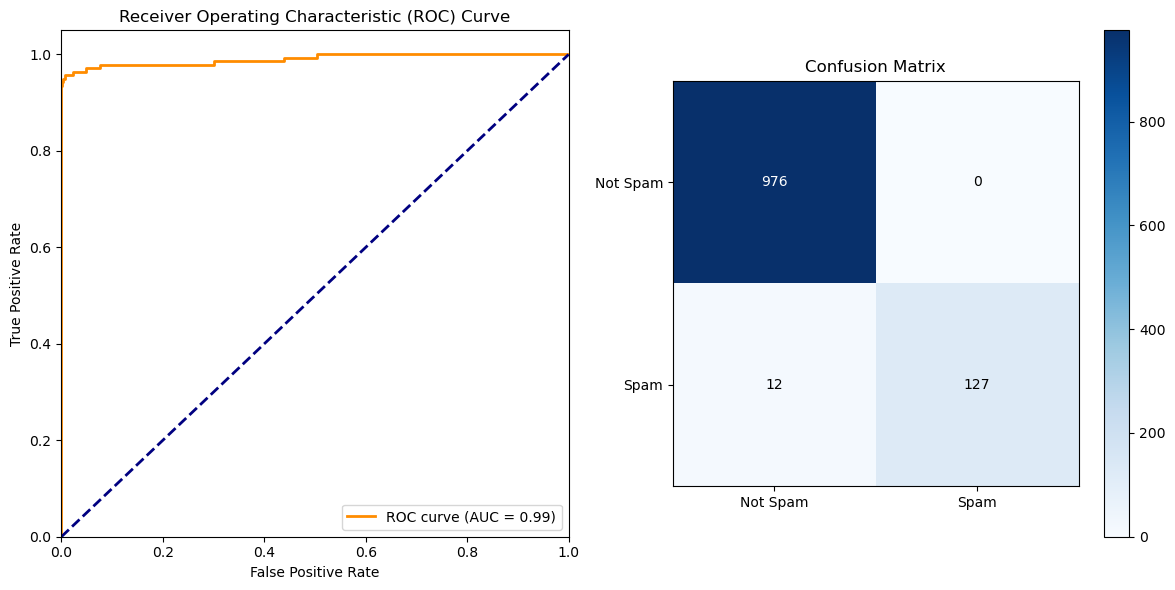

In [112]:
from sklearn.linear_model import SGDClassifier

# Create an SGD classifier
sgd_classifier = SGDClassifier(loss='hinge')

# Define the parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # You can adjust the values of alpha as needed
    'penalty': ['l1', 'l2'],  # You can adjust the penalty options as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(sgd_classifier, param_grid, cv=5)  # You can adjust the cross-validation folds (cv) as needed

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_sgd = grid_search.best_estimator_

# Predict on the test set using the best estimator
pred_test_best = best_sgd.predict(X_test)

# Calculate and print accuracy
acc_best = accuracy_score(y_test, pred_test_best)
print("Best Accuracy:", acc_best)
print("Best Parameters:", grid_search.best_params_)

# Calculate decision function scores for ROC curve
decision_scores = best_sgd.decision_function(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)
roc_auc = roc_auc_score(y_test, decision_scores)

# Plot ROC curve and confusion matrix side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot confusion matrix
cm = confusion_matrix(y_test, pred_test_best)
im = ax2.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix")
plt.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(2))
ax2.set_xticklabels(['Not Spam', 'Spam'])
ax2.set_yticklabels(['Not Spam', 'Spam'])

# Display numbers on confusion matrix
for i in range(2):
    for j in range(2):
        ax2.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

fig.tight_layout()
plt.show()


### Gradient boosting classifier

Best Accuracy: 0.9730941704035875
Best Parameters: {'learning_rate': 0.2}


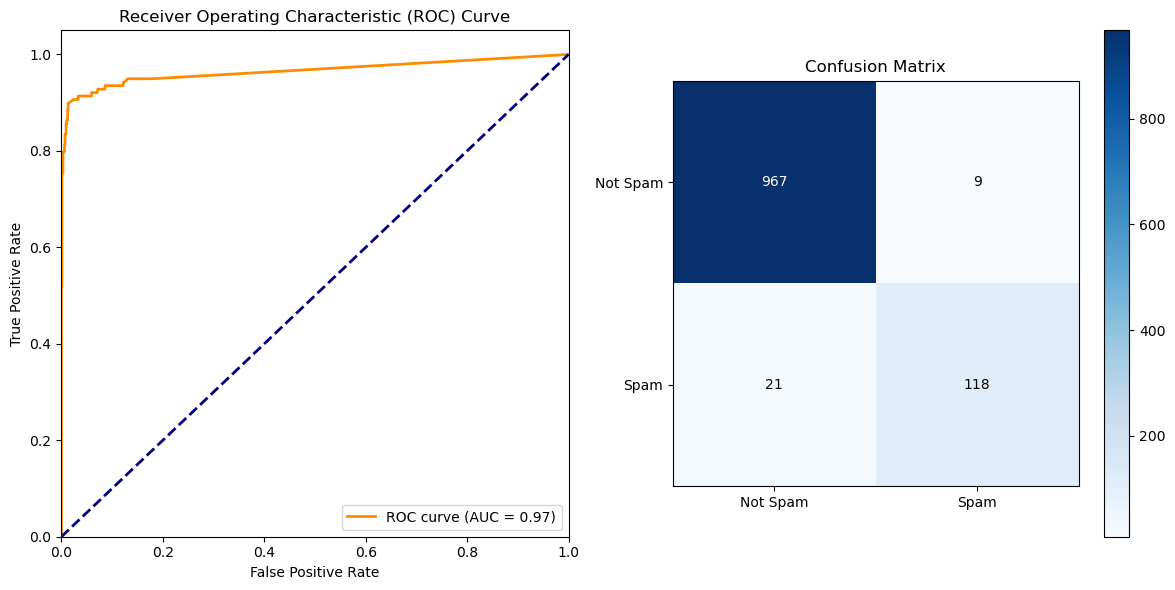

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # You can adjust the learning rate as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)  # You can adjust the cross-validation folds (cv) as needed

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_gb = grid_search.best_estimator_

# Predict on the test set using the best estimator
pred_test_best = best_gb.predict(X_test)

# Calculate and print accuracy
acc_best = accuracy_score(y_test, pred_test_best)
print("Best Accuracy:", acc_best)
print("Best Parameters:", grid_search.best_params_)

# Calculate predicted probabilities for ROC curve
pred_probs = best_gb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

# Plot ROC curve and confusion matrix side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot confusion matrix
cm = confusion_matrix(y_test, pred_test_best)
im = ax2.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix")
plt.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(2))
ax2.set_xticklabels(['Not Spam', 'Spam'])
ax2.set_yticklabels(['Not Spam', 'Spam'])

# Display numbers on confusion matrix
for i in range(2):
    for j in range(2):
        ax2.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

fig.tight_layout()
plt.show()


### XG Boost Classifier

In [117]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:0000:0100:01


Best Accuracy: 0.9695067264573991
Best Parameters: {'learning_rate': 0.2, 'max_depth': 6}


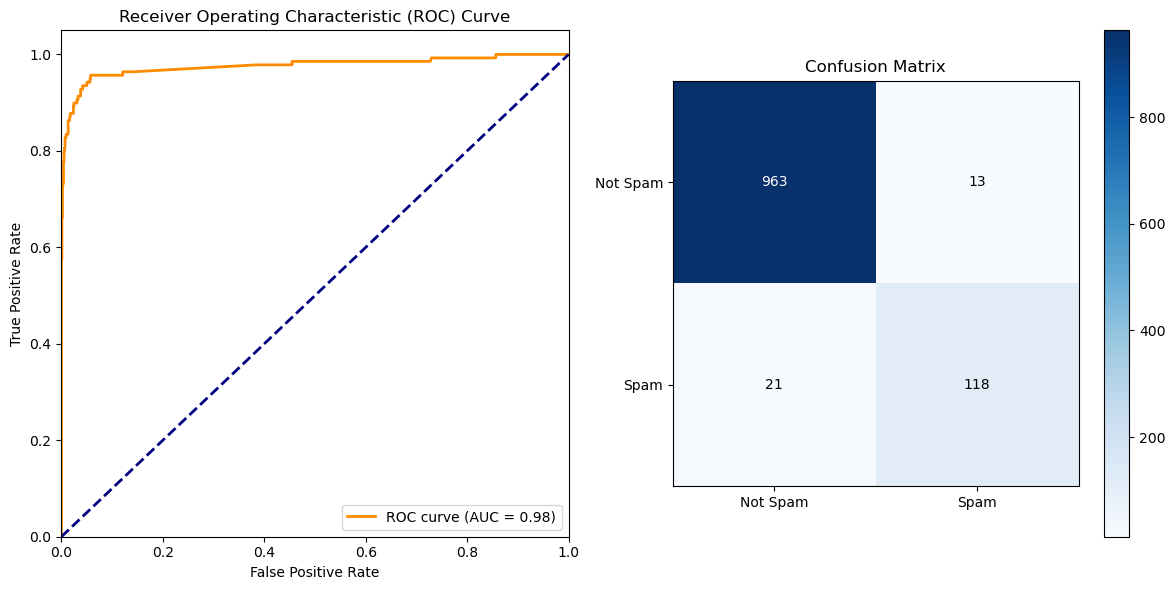

In [118]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # You can adjust the learning rate as needed
    'max_depth': [5,6]  # You can adjust the maximum depth as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)  # You can adjust the cross-validation folds (cv) as needed

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_xgb = grid_search.best_estimator_

# Predict on the test set using the best estimator
pred_test_best = best_xgb.predict(X_test)

# Calculate and print accuracy
acc_best = accuracy_score(y_test, pred_test_best)
print("Best Accuracy:", acc_best)
print("Best Parameters:", grid_search.best_params_)

# Calculate predicted probabilities for ROC curve
pred_probs = best_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

# Plot ROC curve and confusion matrix side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot confusion matrix
cm = confusion_matrix(y_test, pred_test_best)
im = ax2.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix")
plt.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(2))
ax2.set_xticklabels(['Not Spam', 'Spam'])
ax2.set_yticklabels(['Not Spam', 'Spam'])

# Display numbers on confusion matrix
for i in range(2):
    for j in range(2):
        ax2.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

fig.tight_layout()
plt.show()
